# pystan document

## Getting started
https://pystan.readthedocs.io/en/latest/getting_started.html

In [4]:
import pystan

schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19a09b474d1901f191444eaf8a6b8ce2 NOW.


In [7]:
la = fit.extract(permuted=True)  # return a dictionary of arrays
mu = la['mu']

## return an array of three dimensions: iterations, chains, parameters
a = fit.extract(permuted=False)

print(fit)

Inference for Stan model: anon_model_19a09b474d1901f191444eaf8a6b8ce2.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         8.18    0.17   5.03  -0.89   4.94   7.97  11.24  18.41    896    1.0
tau        6.81    0.21   5.66   0.16   2.69    5.5   9.45  21.34    714   1.01
eta[1]     0.41    0.02   0.94  -1.45   -0.2   0.41   1.04   2.24   1923    1.0
eta[2]    -0.03    0.02   0.85  -1.77  -0.57  -0.02   0.52   1.71   2286    1.0
eta[3]    -0.25    0.02   0.91  -1.96  -0.86  -0.23   0.34   1.49   2085    1.0
eta[4]    -0.03    0.02    0.9  -1.75  -0.62  -0.05   0.57    1.8   2064    1.0
eta[5]    -0.38    0.02   0.86  -2.09  -0.94   -0.4   0.16   1.37   1533    1.0
eta[6]    -0.19    0.02   0.86  -1.86  -0.77  -0.22   0.37   1.51   1980    1.0
eta[7]     0.34    0.02   0.86  -1.39  -0.25   0.34   0.93   2.02   1514    1.0
eta[8]     0.

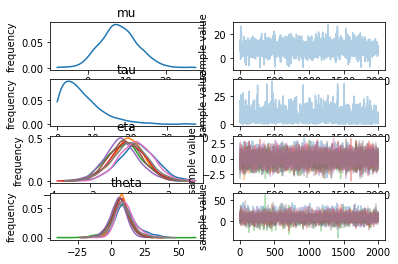

In [8]:
fit.plot()

## Optimization in Stan
https://pystan.readthedocs.io/en/latest/optimizing.html

In [11]:
import pystan
import numpy as np

ocode = """
data {
    int<lower=1> N;
    real y[N];
}
parameters {
    real mu;
}
model {
    y ~ normal(mu, 1);
}
"""
sm = pystan.StanModel(model_code=ocode)
y2 = np.random.normal(size=20)
np.mean(y2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3aaa1aff3be33470f8a5bfa56085d51c NOW.


0.0071503865654682693

In [12]:
op = sm.optimizing(data=dict(y=y2, N=len(y2)))
op

OrderedDict([('mu', array(0.007150386565469069))])